In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import math

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [3]:
### Configuration
dataFile = '../Data/FormationPrediction.csv'

# Data columns
colsInputs = ['GammaRay_API','BulkDensity_GPerCC','Resistivity_OHMSM','DensityPorosity_PCT','EffectivePorosity_PCT','TotalOrganicCarbon_WTPCT']
colsOutputs = ['Formation Class']
colsDrop = ['WellName','Latitude_BH','Longitude_BH','TopOfZone_FT','BottomOfZone_FT','Isopach_FT','TVD_FT']

# Split train and test data
testsize = 0.25
cv = 5

In [4]:
### Data Loading (raw data)
df = pd.read_csv(dataFile)
df = df.drop(columns=colsDrop,axis='columns')

In [5]:
### Data Pre-processing
inputs = df[colsInputs]
outputs = df[colsOutputs]

# Split "Train" and "Test" data
[xtrain,xtest,ytrain,ytest] = train_test_split(inputs,outputs,test_size=testsize,random_state=19)
print("Train Size = " + str(len(xtrain)) + ", Test Size = " + str(len(xtest)))

Train Size = 5127, Test Size = 1710


In [6]:
# Linear Discriminant Analysis
clf = LinearDiscriminantAnalysis()
model = clf.fit(xtrain,ytrain.values.ravel())

# Model prediction
ytestpred = model.predict(xtest)
confusion_matrix(ytest,ytestpred)

array([[1417,   21],
       [  74,  198]], dtype=int64)

[1.]
[[2.44950574e-02 5.65261612e+01 1.09527336e-02 1.31561874e+02
  6.71385951e+01 1.03835916e+00]]
[-173.4223565]


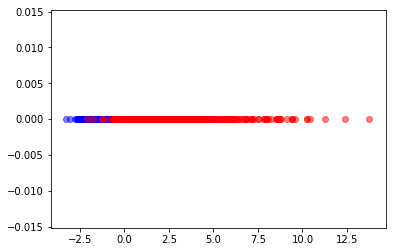

In [7]:
tmodel = model.transform(xtrain)

print(clf.explained_variance_ratio_)
print(clf.coef_)
print(clf.intercept_)

plt.figure()
for color, i, target_name in zip(['blue','red'], ['A','B'], ['A','B']):
    plt.scatter(tmodel[ytrain == i], 0*tmodel[ytrain == i], alpha=.5, color=color, label=target_name)